# Castañas

En este documento se va a crear un modelo para las castañas para su posterior análisis con XAI

## Carga de datos ya aumentados

In [3]:
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import numpy as np

2025-05-24 00:33:24.587106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748046804.769850      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748046804.821953      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
dataset_dir = '/kaggle/input/castanas-aug-ds/castanas_aug_ds'

train, val = keras.utils.image_dataset_from_directory (
    directory=dataset_dir,
    batch_size=32,
    shuffle=True,
    labels="inferred" ,
    class_names= ["no_comible", "comible"],
    label_mode='binary',
    color_mode='rgb',
    image_size=(256,256),
    validation_split=0.2,
    subset='both',
    seed=69,
    )


Found 2186 files belonging to 2 classes.
Using 1749 files for training.
Using 437 files for validation.


I0000 00:00:1748046819.710400      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [5]:
def ver_imgs(dataset: tf.data.Dataset):
    clases = ['no comible', 'comible']
    plt.figure(figsize=(5,5))
    # plt.subplots_adjust(hspace=10)

    imgs, labels = next(iter(dataset.take(1)))

    for i in range(3):
        img, label = imgs[i], labels[i]
        ax = plt.subplot(1,3,i+1)
        ax.set_axis_off()
        plt.imshow( img.numpy().astype('uint8') )
        plt.title ( clases[int(label.numpy())])


    plt.tight_layout()
    plt.show()
        

/tmp/ipykernel_35/346393394.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title ( clases[int(label.numpy())])


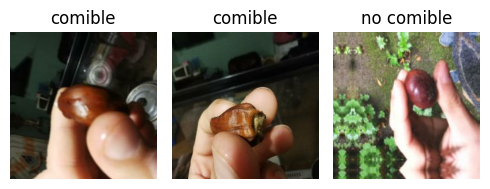

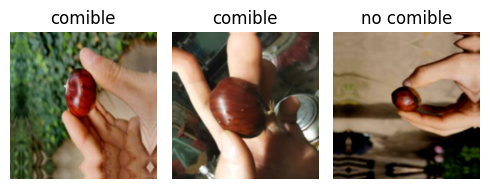

In [6]:
ver_imgs(train)
ver_imgs(val)

## Modelo CNN

In [33]:
modificar_img = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomTranslation(0.1, 0.1),
    keras.layers.RandomContrast(0.2)
])

In [162]:
model = keras.Sequential([
    keras.Input(shape=(256, 256, 3)),
    keras.layers.Rescaling(1./255),
    modificar_img, 
    #1
    #agregado kernel_regularizer=keras.regularizers.l2(0.001)
    keras.layers.Conv2D( filters=32, kernel_size=(5,5)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #2
    keras.layers.Conv2D( filters=64, kernel_size=(7,7)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #3
    keras.layers.Conv2D( filters=64, kernel_size=(3,3)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #4
    keras.layers.Conv2D( filters=64, kernel_size=(3,3)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    #5
    keras.layers.Conv2D( filters=64, kernel_size=(3,3)),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D((2,2)),
    # keras.layers.Dropout(0.2) ,
    
    #agregado drop 0.2->0.4, kernel_regularizer=keras.regularizers.l2(0.001)
    keras.layers.Flatten(),
    #1
    keras.layers.Dense(units= 128),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # keras.layers.Dropout(0.4) ,
    #2
    keras.layers.Dense(units= 64),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # keras.layers.Dropout(0.2) ,
    #3
    keras.layers.Dense(units= 32),
    # keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # keras.layers.Dropout(0.2) ,
    keras.layers.Dense(units= 1, activation='sigmoid'),
],
trainable=True,
)

model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_26 (Rescaling)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_96 (ReLU)                      │ (None, 252, 252, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_94 (MaxPooling2D)      │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 120, 120, 64)        │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_97 (ReLU)                      │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_95 (MaxPooling2D)      │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 58, 58, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_98 (ReLU)                      │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_99 (ReLU)                      │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_97 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_100 (ReLU)                     │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_101 (ReLU)                     │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 428,929 (1.64 MB)

 Trainable params: 428,929 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 4,
    min_delta=0.001, #agregado
    restore_best_weights = True,
    )

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005 ),
    # optimizer='adam',
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy'],
    )

In [164]:
history = model.fit(
    train,
    epochs=10, 
    validation_data=val,
    callbacks = [early_stop],
    class_weight={0: 1.5, 1: 1.0}, #agregado, utillll
)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.6170 - loss: 0.7652 - val_accuracy: 0.7963 - val_loss: 0.4770
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7725 - loss: 0.5910 - val_accuracy: 0.7986 - val_loss: 0.4162
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7958 - loss: 0.5106 - val_accuracy: 0.6934 - val_loss: 0.5672
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7748 - loss: 0.5201 - val_accuracy: 0.8032 - val_loss: 0.4000
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7992 - loss: 0.4538 - val_accuracy: 0.8055 - val_loss: 0.3977
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8616 - loss: 0.3956 - val_accuracy: 0.8833 - val_loss: 0.2889
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8287 - loss: 0.4211 - val_accuracy: 0.8535 - val_loss: 0.3088
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8508 - loss: 0.3904 - val_accuracy: 0.8627 - v

In [168]:
!mkdir -p "/kaggle/working/modelos/"
model.save("/kaggle/working/modelos/Castanas_Model_1_91.keras")

14/14 - 0s - 18ms/step - accuracy: 0.8856 - loss: 0.2580
val accuaricy: 0.8855835199356079 val loss: 0.2579968571662903


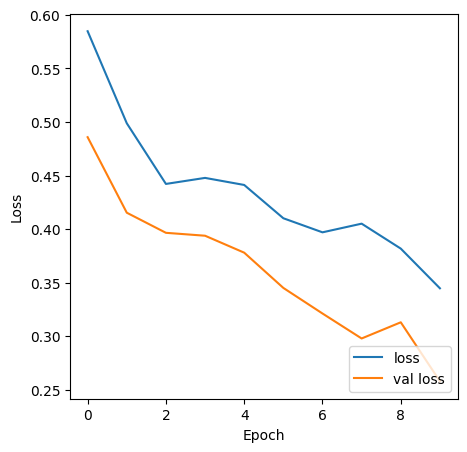

In [155]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

val_loss, val_acc = model.evaluate(val, verbose=2)
print(f'val accuaricy: {val_acc} val loss: {val_loss}')

In [159]:
# Obtener una sola imagen del batch
# `img1` es de forma (32, 256, 256, 3), por lo que seleccionamos una sola imagen:
img_single = img1[0].numpy() / 255.0  # (256, 256, 3)

# Expandir dimensiones para hacerla (1, 256, 256, 3), que es lo que espera el modelo
img_single_batch = np.expand_dims(img_single, axis=0)

# Pasar una sola imagen al modelo
_ = model(img_single_batch)

# Crear extractor de características
input = model.layers[0].input
intermediate_layer = model.get_layer(index=14)
output = intermediate_layer.output
feature_extractor = keras.models.Model(inputs=input, outputs=output)

# Obtener feature maps
feature_maps = feature_extractor.predict(img_single_batch)

print("Forma de feature_maps:", feature_maps.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Forma de feature_maps: (1, 11, 11, 64)


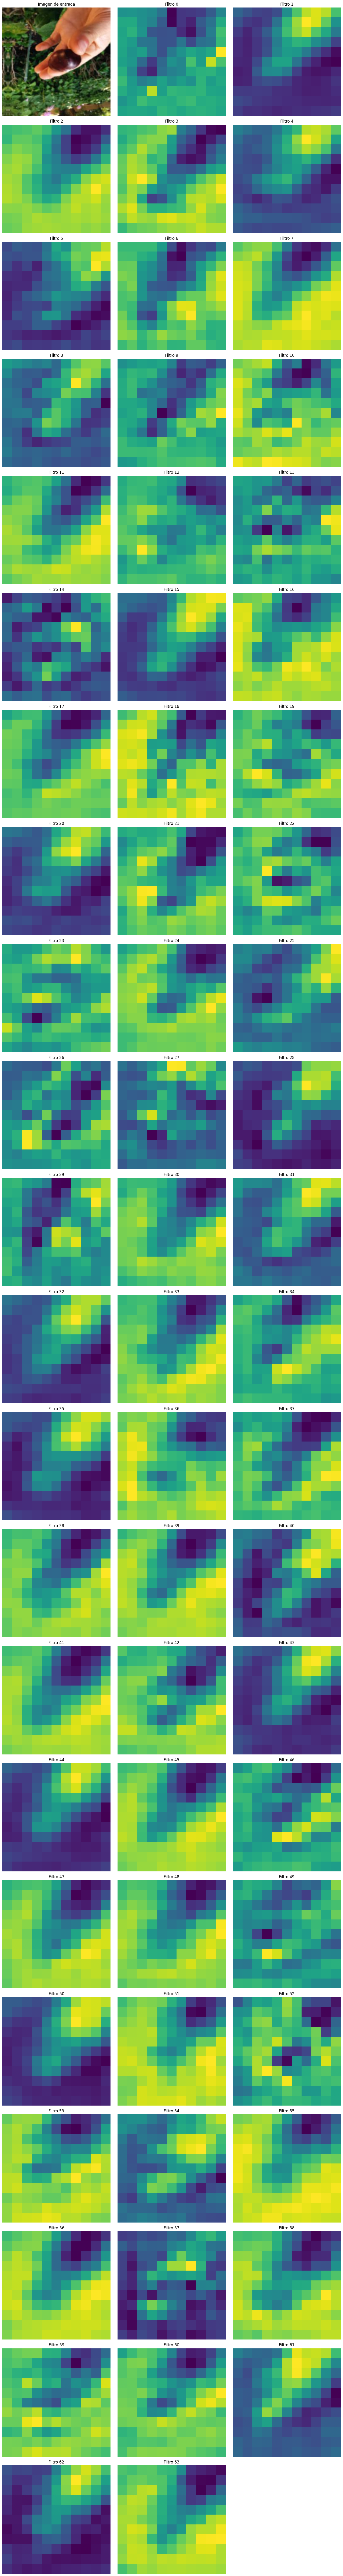

In [160]:
# Número de filtros
num_filters = feature_maps.shape[-1]
cols = 3
rows = math.ceil((num_filters + 1) / cols)

# Plotear imagen y filtros
plt.figure(figsize=(5 * cols, 5 * rows))

# Imagen original
plt.subplot(rows, cols, 1)
plt.imshow(img_single)
plt.title('Imagen de entrada')
plt.axis('off')

# Filtros
for i in range(num_filters):
    plt.subplot(rows, cols, i + 2)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.title(f'Filtro {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()